# **1) Importing libraries**

In [ ]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
from google.colab import files
import io
from sklearn.model_selection import train_test_split

**Dataset upload**

In [ ]:
uploaded = files.upload()

Saving waterQuality1.csv to waterQuality1.csv


In [ ]:
#File name setting
fileName = list(uploaded.keys())[0]
print(fileName)

waterQuality1.csv


# **2) Initializing**

reading the file

In [ ]:
pd_data= pd.read_csv(fileName)
pd_data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


Vectorizing


In [ ]:
data = pd_data.to_numpy()
data = data[:, 3:]
row,col = data.shape

In [ ]:
x= data[:,0:col-1]
y= data[:,col-1:col]

# **Train Test**

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [ ]:
x_train.shape

(5999, 17)

# **Model Fitting**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(x_train, y_train)

<ipython-input-231-b4aa57e88a05>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

# **Testing**

In [ ]:
y_pred= classifier.predict(x_test)
print(y_pred)

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

['0' '0' '0' ... '0' '0' '0']
[[   0    1    0]
 [   0 1676   99]
 [   0  150   74]]


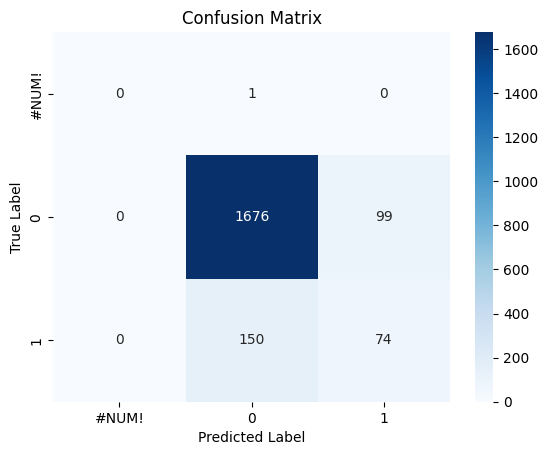

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# Define class labels
classes = np.unique(y_test)

# Create a seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you already have cm (confusion matrix) calculated
# Calculate accuracy from the confusion matrix
accuracy = np.trace(cm) / float(np.sum(cm))

print(f"Accuracy of the model: {accuracy * 100:.2f}%")

Accuracy of the model: 87.50%


In [ ]:
from sklearn.metrics import precision_score

# Assuming you have y_test and y_pred defined

precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision of the algorithm: {precision}')

Precision of the algorithm: 0.8620563923928485


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import recall_score

# Assuming you have y_test and y_pred defined

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall of the algorithm: {recall}')


Recall of the algorithm: 0.875
